In [7]:
# データを総合して解析を行う
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
os.chdir("フォルダのパス")
print(os.getcwd())

In [3]:
#ここにタグ名を入力
name1="Liver-f"
name2="Liver-d"
name3="Ovary-f"
name4="Ovary-d"
name5="R muscle-f"
name6="R muscle-d"
name7="W muscle-f"
name8="W muscle-d"
name9="Spleen-f"
name10="Spleen-d"

name =(name1,name2,name3,name4,name5,name6,name7,name8,name9,name10)

In [4]:
#ここに読み取るファイル名を入力
file1="skj_frozen_liver.xan"
file2="skj_dry_liver.xan"

file3="skj_frozen_ovary.xan"
file4="skj_dry_ovary.xan"

file5="skj_frozen_r_muscle.xan"
file6="skj_dry_r_muscle.xan"

file7="skj_frozen_w_muscle.xan"
file8="skj_dry_w_muscle.xan"

file9="skj_frozen_spleen.xan"
file10="skj_dry_spleen.xan"

file=(file1,file2,file3,file4,file5,file6,file7,file8,file9,file10)

In [5]:
spectrum=[[],[]]
n,m = 1, 1
for k in range(len(file)):
    p = pd.read_csv(file[k])
    for i in range(len(p)):
        if p["[XAN_DATA]"][i]=="[BG_BEGIN]":
            n = i
        elif p["[XAN_DATA]"][i]=="[BG_END]":
            m = i
        else: continue
    data = pd.read_csv(file[k],encoding="SHIFT_JIS",sep=('\t'),usecols=[1,2,3,4],names=[1,2,3,4],skiprows=n+3)[1:m-n]
    spectrum[0].append(data[1])
    spectrum[1].append(data[2])


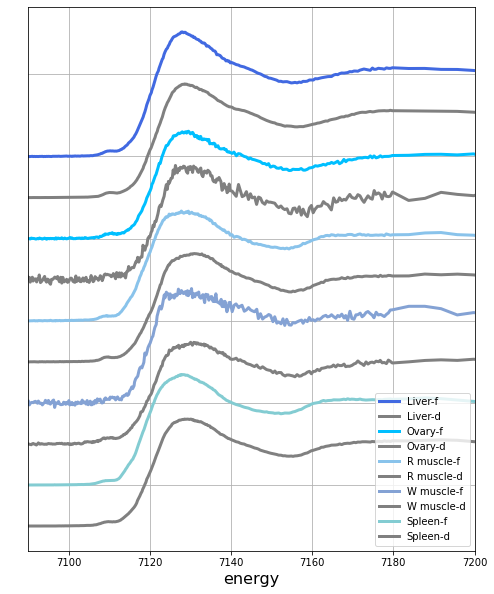

In [6]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111)
ax.set_xlabel("energy",fontsize=16)
ax.set_ylabel(" ")
ax.axes.yaxis.set_ticklabels([])
ax.set_xlim(7090, 7200)
ax.grid()
ax.tick_params(left=False)


color = ["#4169e1","gray","#00bfff","gray","#89c3eb","gray","#84a2d4","gray","#83ccd2","gray"]
for n in range(len(spectrum[1])):
    energy = [float(i) for i in spectrum[0][n]]
    line = spectrum[1][n] + 5 - n/2 
    ax.plot(energy,line,color=color[n],linewidth = 3, label=name[n])
ax.legend(loc="lower right")
